# **Global Store Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import datetime as dt

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/Global Superstore.xls')

In [3]:
df.head(100)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.00,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.10,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.10,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.10,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.00,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31278,IN-2012-86698,2012-05-07,2012-05-07,Same Day,NC-18625,Noah Childs,Corporate,Newcastle,New South Wales,...,FUR-TA-10003627,Furniture,Tables,"Bevis Conference Table, with Bottom Storage",1847.520,2,0.00,738.9600,545.89,High
96,12035,ES-2013-2903666,2013-11-27,2013-11-29,First Class,NF-18385,Natalie Fritzler,Consumer,Graz,Styria,...,FUR-BO-10001133,Furniture,Bookcases,"Ikea Classic Bookcase, Mobile",2899.890,7,0.00,927.7800,541.59,High
97,29149,IN-2012-30446,2012-11-28,2012-12-02,Second Class,NZ-18565,Nick Zandusky,Home Office,Nowra,New South Wales,...,FUR-CH-10000027,Furniture,Chairs,"SAFCO Executive Leather Armchair, Black",2891.700,7,0.10,96.3900,541.57,Medium
98,15896,IT-2012-1779015,2012-09-29,2012-09-29,Same Day,PM-18940,Paul MacIntyre,Consumer,Boulogne-Billancourt,Ile-de-France,...,TEC-MA-10003515,Technology,Machines,"Panasonic Printer, Red",2016.846,9,0.15,-0.0540,540.77,Critical


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [6]:
df.shape

(51290, 24)

In [7]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [8]:
df['Postal Code']

,Postal Code
0,10024.0
1,NaN
2,NaN
3,NaN
4,NaN
...,...
51285,NaN
51286,77095.0
51287,93030.0
51288,NaN


# **Data Overview**

In [9]:
df['Order Date'].count()

51290

In [10]:
df['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

# **Descriptive Analysis**

In [11]:
df[['Sales' , 'Quantity', 'Profit']].describe()

,Sales,Quantity,Profit
count,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,28.610982
std,487.565361,2.278766,174.340972
min,0.444000,1.000000,-6599.978000
25%,30.758625,2.000000,0.000000
50%,85.053000,3.000000,9.240000
75%,251.053200,5.000000,36.810000
max,22638.480000,14.000000,8399.976000


In [12]:
df[['Sales' , 'Quantity', 'Profit']].mean()

,0
Sales,246.490581
Quantity,3.476545
Profit,28.610982


In [13]:
df[['Sales' , 'Quantity', 'Profit']].median()

,0
Sales,85.053
Quantity,3.000
Profit,9.240


In [14]:
df[['Sales' , 'Quantity', 'Profit']].std()

,0
Sales,487.565361
Quantity,2.278766
Profit,174.340972


# **Most profitable category and sub-category**.

In [15]:
df1 = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
df1

,Profit
Category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,285204.72380


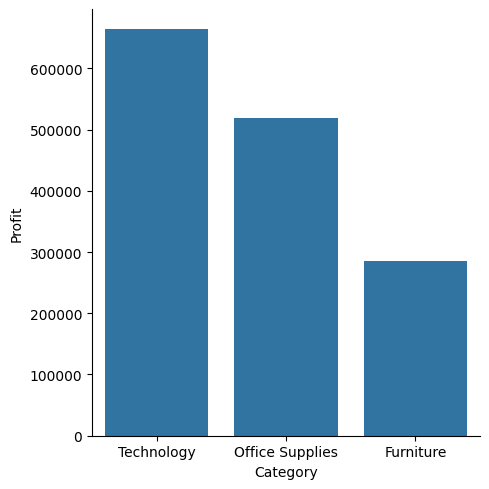

In [16]:
sns.catplot(df1,kind='bar')

In [17]:
df2 = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
df2

,Profit
Sub-Category,
Copiers,258567.54818
Phones,216717.00580
Bookcases,161924.41950
Appliances,141680.58940
Chairs,140396.26750
Accessories,129626.30620
Storage,108461.48980
Binders,72449.84600
Paper,59207.68270


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Copiers'),
  Text(1, 0, 'Phones'),
  Text(2, 0, 'Bookcases'),
  Text(3, 0, 'Appliances'),
  Text(4, 0, 'Chairs'),
  Text(5, 0, 'Accessories'),
  Text(6, 0, 'Storage'),
  Text(7, 0, 'Binders'),
  Text(8, 0, 'Paper'),
  Text(9, 0, 'Machines'),
  Text(10, 0, 'Art'),
  Text(11, 0, 'Furnishings'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Supplies'),
  Text(14, 0, 'Labels'),
  Text(15, 0, 'Fasteners'),
  Text(16, 0, 'Tables')])

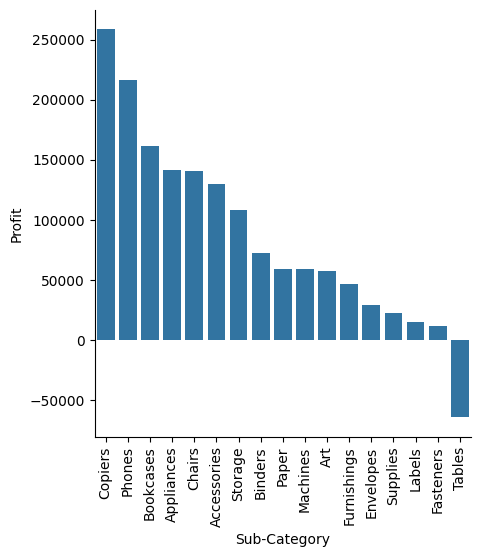

In [18]:
sns.catplot(df2,kind='bar')
plt.xticks(rotation=90)

# **Data Aggregation and Grouping**

# Sales by Region : Group the data by Region and calculate the total sales, average profit, and count of orders for each region.


In [19]:
df.groupby('Region')['Sales'].sum()

,Sales
Region,
Africa,7.837732e+05
Canada,6.692817e+04
Caribbean,3.242809e+05
Central,2.822303e+06
Central Asia,7.528266e+05
EMEA,8.061613e+05
East,6.787812e+05
North,1.248166e+06
North Asia,8.483098e+05


In [20]:
df.groupby('Region')['Profit'].mean()

,Profit
Region,
Africa,19.374674
Canada,46.399453
Caribbean,20.456403
Central,28.011512
Central Asia,64.687591
EMEA,8.728966
East,32.135808
North,40.668329
North Asia,70.820539


In [21]:
df.groupby('Region')['Order ID'].count()

,Order ID
Region,
Africa,4587
Canada,384
Caribbean,1690
Central,11117
Central Asia,2048
EMEA,5029
East,2848
North,4785
North Asia,2338


# **Top 5 Profitable Cities**: Find the top 5 cities with the highest total profit. Display the city names and their corresponding total profit.

In [22]:
df.groupby('City')['Profit'].sum().sort_values(ascending=False).head()

,Profit
City,
New York City,62036.98370
Los Angeles,30440.75790
Seattle,29156.09670
Managua,17853.71804
San Francisco,17507.38540


# **Monthly Sales Analysis**: Extract the month and year from the Order Date. Group the data by Year and Month, and calculate the total sales for each month. Plot the monthly sales trend over the years

In [23]:
df['year']= pd.DatetimeIndex(df['Order Date']).year

In [24]:
df['month']=df['Order Date'].dt.month

In [25]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11


In [26]:
df.groupby('month')['Sales'].sum()

,Sales
month,
1,6.751337e+05
2,5.437394e+05
3,7.705009e+05
4,6.985612e+05
5,9.040123e+05
6,1.269717e+06
7,7.493818e+05
8,1.293833e+06
9,1.437380e+06


In [27]:
df.groupby('year')['Sales'].sum()

,Sales
year,
2011,2.259451e+06
2012,2.677439e+06
2013,3.405746e+06
2014,4.299866e+06


([<matplotlib.axis.XTick at 0x7cf787f1c970>,
 [Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2011, 0, '2011'),
  Text(2014, 0, '2014')])

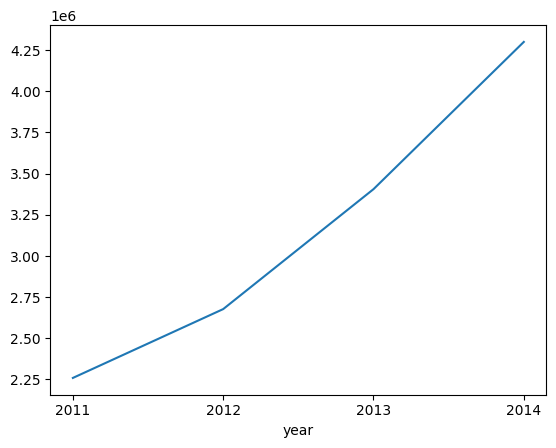

In [28]:
df.groupby('year')['Sales'].sum().plot(kind='line')
# Set the x-axis ticks to the specific years you want
plt.xticks(df['year'].unique())

Text(0.5, 1.0, 'Sales over Year')

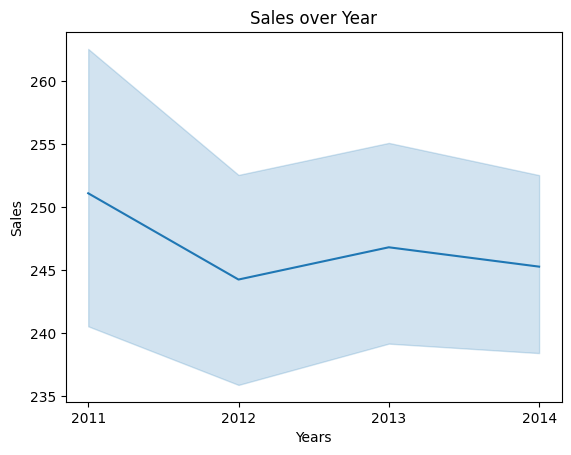

In [29]:
sns.lineplot(data=df,x='year',y='Sales')
plt.xticks(df['year'].unique())
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Sales over Year')

Text(0.5, 1.0, 'Sales over month')

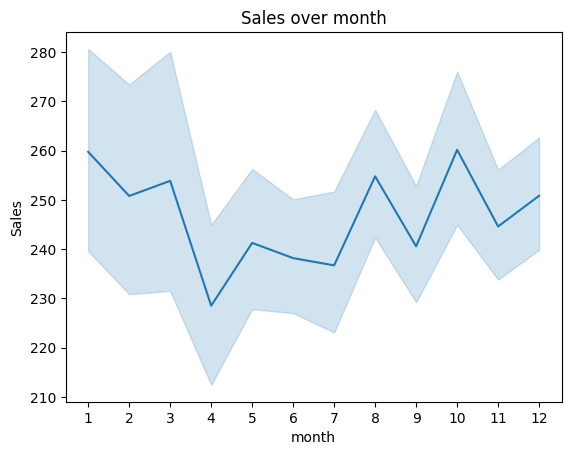

In [30]:
sns.lineplot(data=df,x='month',y='Sales')
plt.xticks(df['month'].unique())
plt.xlabel('month')
plt.ylabel('Sales')
plt.title('Sales over month')

# **Category and Segment Analysis**: Group the data by Category and Segment and find the total sales and average discount given for each combination.

In [31]:
df.groupby('Category')['Sales'].sum()


,Sales
Category,
Furniture,4.110874e+06
Office Supplies,3.787070e+06
Technology,4.744557e+06


In [32]:
df.groupby('Segment')['Sales'].sum()

,Sales
Segment,
Consumer,6.507949e+06
Corporate,3.824698e+06
Home Office,2.309855e+06


In [33]:
df.groupby('Category')['Discount'].mean().sort_values(ascending=False)

,Discount
Category,
Furniture,0.168087
Office Supplies,0.137409
Technology,0.135342


In [34]:
df.groupby('Segment')['Discount'].mean().sort_values(ascending=False)

,Discount
Segment,
Consumer,0.143602
Corporate,0.142931
Home Office,0.140897


# **Data Filtering and Conditional Statements**

# High Discount Analysis: Filter the dataset for orders where the discount was greater than 20%. How many such orders were there, and what was the total profit for these orders?

In [35]:
df['Discount'].unique()

array([0.   , 0.1  , 0.2  , 0.4  , 0.15 , 0.3  , 0.5  , 0.17 , 0.47 ,
       0.25 , 0.002, 0.07 , 0.32 , 0.27 , 0.7  , 0.35 , 0.15 , 0.6  ,
       0.65 , 0.8  , 0.57 , 0.37 , 0.402, 0.55 , 0.202, 0.45 , 0.45 ,
       0.602, 0.85 ])

In [36]:
df[df['Discount']>0.20]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,month
9,40936,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.6440,13,0.40,-1862.3124,865.74,Critical,2012,1
32,32735,CA-2012-139731,2012-10-15,2012-10-15,Same Day,JE-15745,Joel Eaton,Consumer,Amarillo,Texas,...,Chairs,HON 5400 Series Task Chairs for Big and Tall,2453.4300,5,0.30,-350.4900,690.42,High,2012,10
37,31980,US-2014-168116,2014-11-05,2014-11-05,Same Day,GT-14635,Grant Thornton,Corporate,Burlington,North Carolina,...,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.9800,4,0.50,-3839.9904,674.82,High,2014,11
73,21209,IN-2014-30110,2014-08-26,2014-08-27,First Class,LA-16780,Laura Armstrong,Corporate,Palembang,Sumatera Selatan,...,Tables,"Bevis Conference Table, with Bottom Storage",3427.1496,7,0.47,-452.8104,586.57,High,2014,8
83,38540,CA-2014-118892,2014-08-18,2014-08-23,Second Class,TP-21415,Tom Prescott,Consumer,Philadelphia,Pennsylvania,...,Chairs,HON 5400 Series Task Chairs for Big and Tall,4416.1740,9,0.30,-630.8820,566.65,Medium,2014,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51276,31558,US-2014-155299,2014-06-09,2014-06-13,Standard Class,Dl-13600,Dorris liebe,Corporate,Pasadena,Texas,...,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.6240,2,0.80,-4.4660,0.02,Medium,2014,6
51278,43818,NI-2011-4700,2011-09-08,2011-09-10,Second Class,PO-8865,Patrick O'Donnell,Consumer,Lagos,Lagos,...,Art,"Stanley Highlighters, Water Color",5.3640,1,0.70,-6.4560,0.02,High,2011,9
51279,46231,ZI-2011-4350,2011-03-21,2011-03-26,Standard Class,AS-285,Alejandro Savely,Corporate,Harare,Harare,...,Art,"Sanford Highlighters, Easy-Erase",9.6120,2,0.70,-21.1680,0.02,Medium,2011,3
51280,46582,TU-2014-6730,2014-11-29,2014-11-30,First Class,KF-6285,Karen Ferguson,Home Office,Midyat,Mardin,...,Art,"Boston Pens, Blue",34.1280,6,0.60,-49.5720,0.02,Medium,2014,11


In [37]:
len(df['Order ID'].unique())

25035

In [38]:
len(df['Order ID'])

51290

In [39]:
len(df[df['Discount']>0.20])

11328

In [40]:
df[df['Discount']>0.20]['Profit'].sum()

-814682.0867

# **Loss-Making Orders**: Identify the orders where the company incurred a loss (i.e., Profit < 0). How many loss-making orders were there, and what is the total loss amount?

In [41]:
df[df['Profit']<0]['Order ID'].unique()

array(['IN-2013-77878', 'ES-2013-1579342', 'CA-2012-116638', ...,
       'ID-2012-36725', 'US-2014-155299', 'ZI-2011-4350'], dtype=object)

In [42]:
len(df[df['Profit']<0]['Order ID'].unique())

7541

In [43]:
df5 = pd.DataFrame(df[df['Profit']<0]['Order ID'].unique(),columns=['Order ID'])
df5.head(100)

,Order ID
0,IN-2013-77878
1,ES-2013-1579342
2,CA-2012-116638
3,US-2011-128776
4,CA-2012-139731
...,...
95,IT-2011-2051710
96,ID-2014-68183
97,IN-2013-48324
98,US-2012-158323


In [44]:
df[df['Profit']<0]['Profit'].sum()

-920646.15572

# **Orders with High Sales and Low Profit**: Filter the orders where Sales were greater than $1000 but Profit was less than $100. Analyze the product categories involved in these orders.

In [45]:
df6 = df[(df['Sales']>1000) & (df['Profit']<100)].sort_values('Sales',ascending=False)
df6

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,month
12887,33994,CA-2011-145317,2011-03-18,2011-03-23,Standard Class,SM-20320,Sean Miller,Home Office,Jacksonville,Florida,...,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.4800,6,0.50,-1811.0784,24.2865,Medium,2011,3
344,31462,CA-2011-139892,2011-09-08,2011-09-12,Standard Class,BM-11140,Becky Martin,Consumer,San Antonio,Texas,...,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.9520,8,0.40,-1359.9920,342.1100,Medium,2011,9
37,31980,US-2014-168116,2014-11-05,2014-11-05,Same Day,GT-14635,Grant Thornton,Corporate,Burlington,North Carolina,...,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.9800,4,0.50,-3839.9904,674.8200,High,2014,11
1156,28242,ID-2012-34884,2012-08-02,2012-08-08,Standard Class,SC-20305,Sean Christensen,Consumer,Adelaide,South Australia,...,Chairs,"Hon Executive Leather Armchair, Black",5759.9640,14,0.10,-0.3360,187.1900,Medium,2012,8
80,13879,ES-2014-3785216,2014-11-19,2014-11-23,Standard Class,HG-14845,Harry Greene,Consumer,Lille,Nord-Pas-de-Calais,...,Chairs,"Hon Executive Leather Armchair, Adjustable",5729.3460,14,0.10,63.5460,572.9500,High,2014,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29804,23304,ID-2014-73083,2014-03-19,2014-03-24,Standard Class,VP-21760,Victoria Pisteka,Corporate,Yangon,Yangon,...,Chairs,"Hon Executive Leather Armchair, Black",1001.1366,3,0.27,-233.2134,5.5700,Medium,2014,3
5160,20619,ID-2012-59384,2012-08-10,2012-08-16,Standard Class,LP-17080,Liz Pelletier,Consumer,Jakarta,Jakarta,...,Chairs,"Hon Executive Leather Armchair, Black",1001.1366,3,0.27,-233.2134,64.6800,Medium,2012,8
2639,4737,MX-2012-105718,2012-09-25,2012-10-01,Standard Class,JG-15160,James Galang,Consumer,Mérida,Yucatán,...,Phones,"Nokia Audio Dock, VoIP",1000.9800,9,0.00,9.9000,109.3390,Medium,2012,9
1799,28921,IN-2013-37446,2013-08-07,2013-08-11,Second Class,RH-19555,Ritsa Hightower,Consumer,Bacoor,Calabarzon,...,Machines,"Okidata Printer, White",1000.9125,5,0.25,26.6625,143.0900,Medium,2013,8


In [46]:
df6.groupby('Category')['Sales'].sum()

,Sales
Category,
Furniture,548699.32350
Office Supplies,239390.77460
Technology,464518.97138


In [47]:
df6.groupby('Category')['Profit'].sum()

,Profit
Category,
Furniture,-90023.38280
Office Supplies,-41149.89130
Technology,-61825.33952


In [48]:
df6.groupby('Category')['Discount'].mean().sort_values(ascending=False)

,Discount
Category,
Furniture,0.240861
Office Supplies,0.197020
Technology,0.159200


In [49]:
df6.groupby('Sub-Category')['Sales'].sum()

,Sales
Sub-Category,
Accessories,20928.69960
Appliances,134520.55450
Binders,16753.86500
Bookcases,160428.87940
Chairs,180636.72760
Copiers,148560.36738
Furnishings,1007.23200
Machines,133848.62520
Phones,161181.27920


In [50]:
df6.groupby('Sub-Category')['Profit'].sum().sort_values(ascending= False)

,Profit
Sub-Category,
Furnishings,75.54240
Storage,-640.69880
Accessories,-1703.47190
Supplies,-1935.29220
Copiers,-6549.87262
Bookcases,-15807.34000
Binders,-17998.74480
Appliances,-20575.15550
Chairs,-22535.60140


In [51]:
df6.groupby('Sub-Category')['Discount'].mean().sort_values(ascending=False)

,Discount
Sub-Category,
Binders,0.736364
Tables,0.330569
Chairs,0.213909
Phones,0.204433
Appliances,0.201235
Furnishings,0.200000
Machines,0.199846
Bookcases,0.162913
Accessories,0.127500


In [52]:
df[df['Category']=='Furniture']['Sub-Category'].unique()

array(['Chairs', 'Tables', 'Bookcases', 'Furnishings'], dtype=object)

In [53]:
df[df['Category']=='Technology']['Sub-Category'].unique()

array(['Accessories', 'Phones', 'Copiers', 'Machines'], dtype=object)

In [54]:
df[df['Category']=='Office Supplies']['Sub-Category'].unique()

array(['Binders', 'Supplies', 'Appliances', 'Storage', 'Art', 'Paper',
       'Envelopes', 'Fasteners', 'Labels'], dtype=object)

# **Customer Loyalty Analysis**: Identify the top 10 customers by total sales. Calculate the total number of orders placed by these customers and the average order value.

In [55]:
Top_10_total_sales = df.groupby('Customer ID')['Sales'].sum ().sort_values(ascending=False).head(10)

In [56]:
Top_10_total_sales

,Sales
Customer ID,
TA-21385,35668.12080
GT-14710,34471.89028
TC-20980,34218.26900
SM-20320,31125.29496
BW-11110,30613.61650
HL-15040,29664.23058
SE-20110,29532.62502
PS-19045,29252.31940
RB-19360,29197.63460


In [57]:
total_number_of_orders= df[df['Customer ID'].isin(Top_10_total_sales.index.tolist())]
total_number_of_orders_top_10 = total_number_of_orders['Order ID'].nunique()
total_number_of_orders_top_10

282

In [58]:
total_number_of_orders['Sales'].mean()

472.340121633888

# Analyze the combination of products (Sub-Category) frequently bought together. Use the Order ID to group the products and find the most common pairs of products.


In [59]:
from itertools import combinations
from collections import Counter

In [60]:
orders=df.groupby('Order ID')['Sub-Category'].apply(list)
pairs = []
for order in orders:
    if len(order) > 1:
        pairs.extend(combinations(sorted(order), 2))

In [61]:
pair_counts = Counter(pairs)
most_common_pairs = pair_counts.most_common()

In [62]:
most_common_pairs

[(('Binders', 'Storage'), 1369),
 (('Art', 'Binders'), 1278),
 (('Art', 'Storage'), 1154),
 (('Binders', 'Paper'), 910),
 (('Binders', 'Binders'), 868),
 (('Binders', 'Phones'), 856),
 (('Binders', 'Chairs'), 798),
 (('Binders', 'Furnishings'), 793),
 (('Accessories', 'Binders'), 770),
 (('Paper', 'Storage'), 714),
 (('Phones', 'Storage'), 697),
 (('Art', 'Phones'), 661),
 (('Binders', 'Labels'), 632),
 (('Accessories', 'Storage'), 629),
 (('Chairs', 'Storage'), 629),
 (('Binders', 'Bookcases'), 628),
 (('Art', 'Paper'), 613),
 (('Art', 'Chairs'), 606),
 (('Furnishings', 'Storage'), 596),
 (('Storage', 'Storage'), 593),
 (('Art', 'Furnishings'), 592),
 (('Art', 'Art'), 588),
 (('Accessories', 'Art'), 581),
 (('Binders', 'Envelopes'), 574),
 (('Binders', 'Supplies'), 563),
 (('Labels', 'Storage'), 542),
 (('Binders', 'Fasteners'), 541),
 (('Binders', 'Copiers'), 538),
 (('Art', 'Fasteners'), 529),
 (('Storage', 'Supplies'), 526),
 (('Appliances', 'Binders'), 515),
 (('Bookcases', 'Stora

#**Trend Analysis by Ship Mode** : Analyze the trend in the usage of different Ship Mode over the years. Which shipping mode has grown the most in popularity?

In [63]:
grouped = df.groupby('year')['Ship Mode'].value_counts().reset_index(name='counts')

In [64]:
grouped

,year,Ship Mode,counts
0,2011,Standard Class,5365
1,2011,Second Class,1799
2,2011,First Class,1367
3,2011,Same Day,467
4,2012,Standard Class,6717
5,2012,Second Class,2107
6,2012,First Class,1577
7,2012,Same Day,561
8,2013,Standard Class,8254
9,2013,Second Class,2838


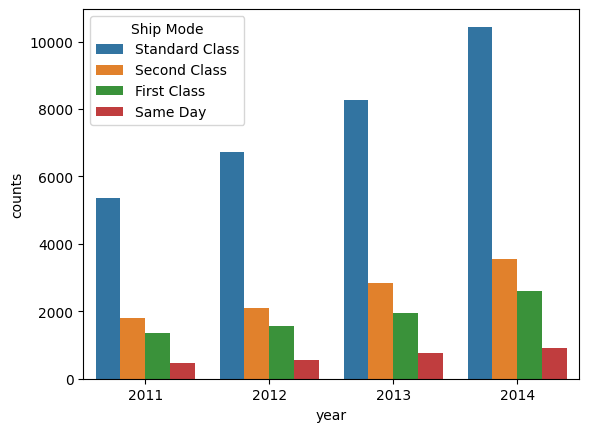

<Figure size 1000x600 with 0 Axes>

In [65]:
# Created an bar graph to visualise and analysis
sns.barplot(x='year',y='counts',hue='Ship Mode',data=grouped)
plt.figure(figsize=(10, 6))
#  Set the aesthetic style of the plots
sns.set(style="whitegrid")

([<matplotlib.axis.XTick at 0x7cf7886b9d20>,
 [Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2011, 0, '2011'),
  Text(2014, 0, '2014')])

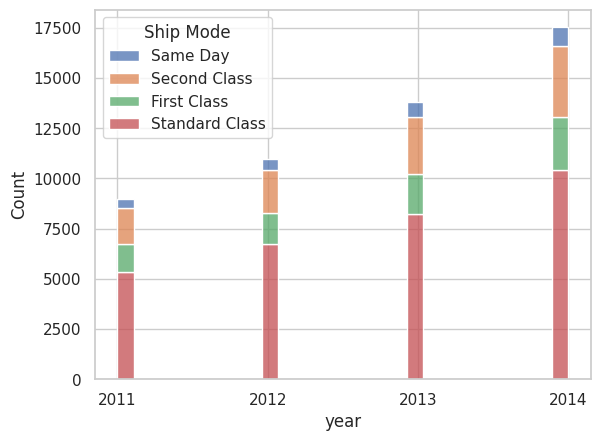

In [66]:
sns.histplot(df,x='year',hue='Ship Mode',multiple='stack')
plt.xticks(df['year'].unique())


# **Profit Margin Analysis**: Calculate the profit margin for each order as a percentage of sales. Identify the product categories with the highest and lowest average profit margins.

In [67]:
df['Profit Margin'] = (df['Profit'] / df['Sales'])*100


In [68]:
df['Profit Margin']

,Profit Margin
0,33.000000
1,-7.784693
2,17.776630
3,-3.337586
4,10.996272
...,...
51285,6.912442
51286,-250.000000
51287,49.000000
51288,17.857143


In [69]:
df.groupby('Category')['Profit Margin'].mean().sort_values(ascending = False)

,Profit Margin
Category,
Office Supplies,5.896465
Technology,4.967903
Furniture,0.859333


# **Regional Performance Analysis**: Create a pivot table to compare the performance (Sales, Profit, Discount) across different regions and product categories. Identify any significant trends or patterns.

In [70]:
pd.pivot_table(df,values=['Sales','Profit','Discount'],index='Region',columns='Category',aggfunc= 'mean')

Discount                                 Profit  \
Category       Furniture Office Supplies Technology   Furniture   
Region                                                            
Africa          0.158637        0.156158   0.157190   25.771926   
Canada          0.000000        0.000000   0.000000   62.220000   
Caribbean       0.196011        0.113052   0.134076   16.551755   
Central         0.178978        0.129916   0.129424   26.662190   
Central Asia    0.049582        0.073357   0.071895  102.375967   
EMEA            0.195065        0.196178   0.196570   14.979397   
East            0.154077        0.142932   0.143364    5.068496   
North           0.237037        0.065614   0.047981   32.721765   
North Asia      0.050575        0.049550   0.044421   99.964178   
Oceania         0.156065        0.154207   0.147832   43.192593   
South           0.169037        0.142423   0.149243   17.044114   
Southeast Asia  0.247147        0.295990   0.234305  -10.581902   
West            0.131400        0.093358   0.133890   16.272914   

                                                 Sales                  \
Category       Office Supplies  Technology   Furniture Office Supplies   
Region                                                                   
Africa                9.353055   48.440717  308.479612       87.604444   
Canada               28.727545  111.486462  252.268571      108.426282   
Caribbean            15.229472   39.676202  314.820213       92.061065   
Central              17.490588   63.484038  420.536453      133.136574   
Central Asia         24.396490  122.962908  594.901469      146.504365   
EMEA                  4.509976   18.185492  296.910047       83.920531   
East                 23.957114   88.714084  346.574383      120.044425   
North                22.101370  107.205714  399.608379      128.597616   
North Asia           30.725304  149.733502  643.134983      149.065146   
Oceania              16.984287   69.813804  553.191380      143.658147   
South                16.686279   39.502863  388.073451      127.357562   
Southeast Asia        2.353780   31.313668  456.166963      136.088596   
West                 27.733183   73.962687  357.302325      116.422377   

                            
Category        Technology  
Region                      
Africa          353.860640  
Canada          404.597077  
Caribbean       341.152625  
Central         486.393284  
Central Asia    666.007222  
EMEA            312.738652  
East            495.278469  
North           535.423576  
North Asia      648.839969  
Oceania         520.411967  
South           448.462695  
Southeast Asia  492.901919  
West            420.687533

# **Sales Distribution**: Create a histogram or density plot of the Sales data. Discuss any skewness or outliers in the distribution.

In [71]:
df9 = df.groupby('Product Name')['Sales'].sum().sort_values(ascending = False).head(10)

In [72]:
df9

,Sales
Product Name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


<Figure size 1000x600 with 0 Axes>

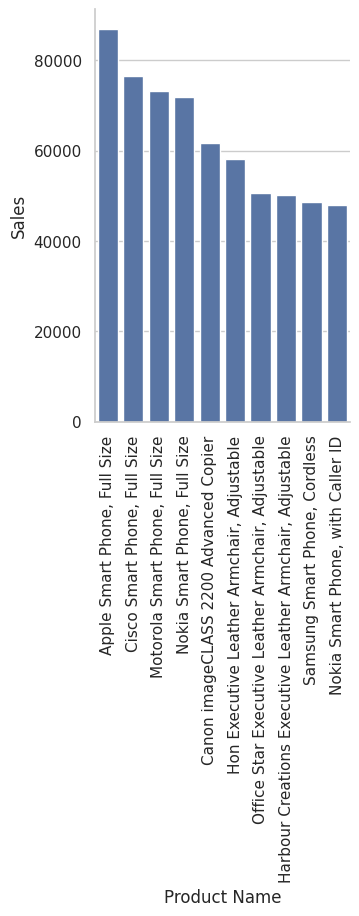

<Figure size 1000x600 with 0 Axes>

In [73]:
sns.set(style='whitegrid')
sns.catplot(df9,kind='bar')
plt.xticks(rotation=90)
plt.figure(figsize=(10,6))

<Axes: >

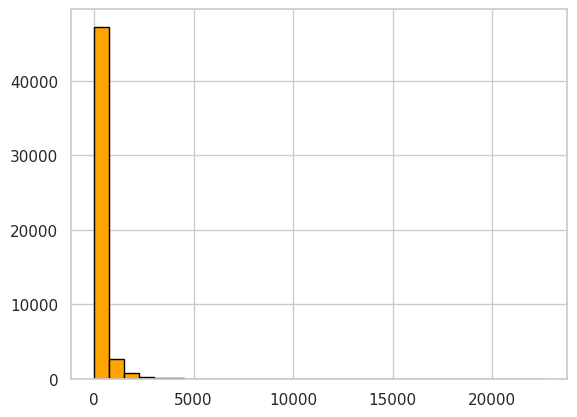

In [74]:
df['Sales'].hist(bins=30,edgecolor = 'black',color='orange')

<Axes: ylabel='Density'>

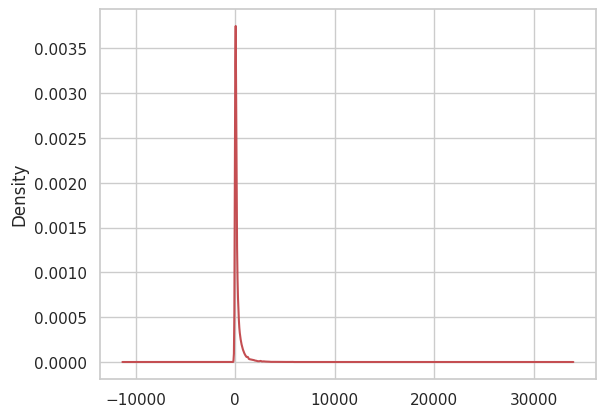

In [75]:
df['Sales'].plot(kind='density',color='r')

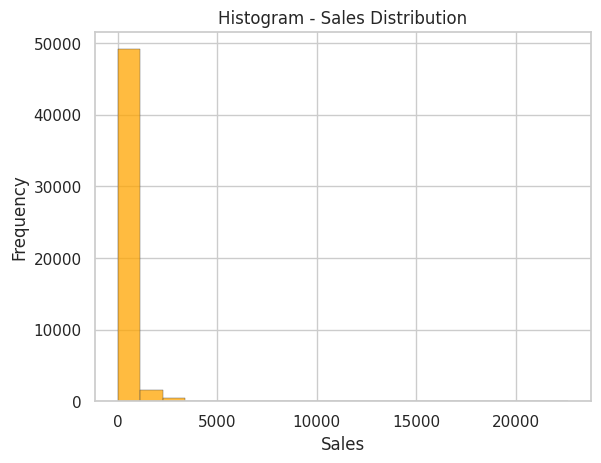

<Figure size 1000x600 with 0 Axes>

In [76]:
# Create histogram plot
sns.histplot(df['Sales'],bins=20,color = 'orange',kde=False,edgecolor=".3",linewidth=.3)
plt.title('Histogram - Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.figure(figsize=(10,6))
plt.show()

<ipython-input-77-1a119860f67f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sales'],shade=True,color='green')


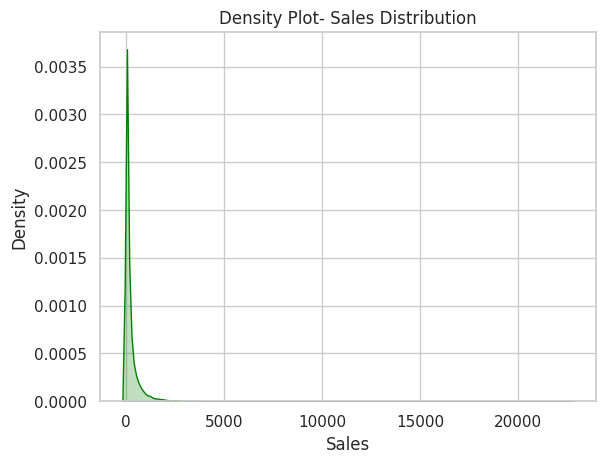

<Figure size 1000x600 with 0 Axes>

In [77]:
# Create density plot on the basis of sales
sns.kdeplot(df['Sales'],shade=True,color='green')
plt.title('Density Plot- Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.figure(figsize=(10,6))
plt.show()

In [78]:
# Analyise the skewness and outliers
Sales_Skewness= df['Sales'].skew()
Sales_description= df['Sales'].describe()
print(f'Skewness of sales:{Sales_Skewness}')
print('\nSales Description:\n',Sales_description)

Skewness of sales:8.138080021220542

Sales Description:
 count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64


<Axes: >

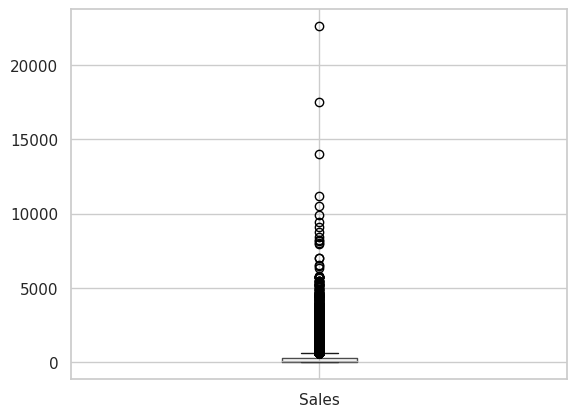

In [79]:
df.boxplot('Sales')

In [80]:
# Identify the outlier using IQR method
data = np.array(df['Sales'])
Q1 = np.percentile(data,25)
Q3 = np.percentile(data,75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = data[(data<lower_bound) | (data>upper_bound)]
outliers

array([2309.65 , 3709.395, 5175.171, ...,  936.27 ,  607.36 ,  772.47 ])

In [81]:
# Identify number of outlier using IQR method
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['Sales']<lower_bound) | (df['Sales']>upper_bound)]
print(f'Number of outliers : {len(outliers)}')

Number of outliers : 5655


Top Products Visualization : Visualize the top 10 products by total sales using a bar plot. Highlight any significant products that stand out.

In [82]:
Product_top_10 = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

In [83]:
Product_top_10

,Sales
Product Name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


<Figure size 1000x600 with 0 Axes>

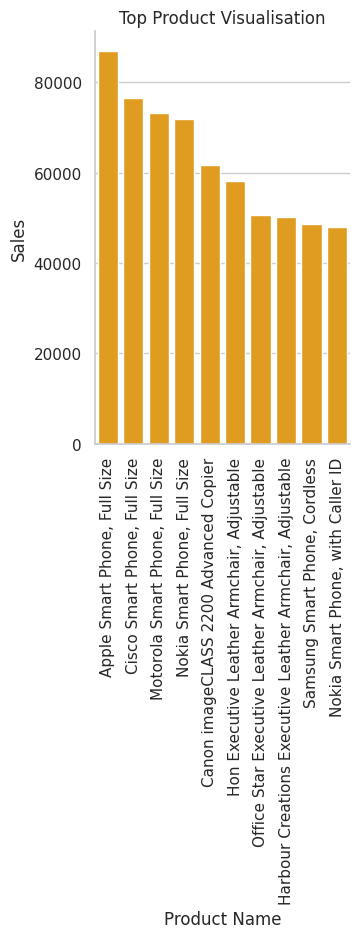

<Figure size 1000x600 with 0 Axes>

In [84]:
sns.catplot(Product_top_10,kind='bar',color='orange')
sns.set(style='whitegrid')
plt.xticks(rotation=90)
plt.title('Top Product Visualisation')
plt.figure(figsize=(10,6))

**Geographical Sales Analysis**:
Create a map visualization to display total sales by state. Identify states with the highest and lowest sales.

In [85]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()
state_sales

,State,Sales
0,England,485170.9710
1,California,457687.6315
2,Ile-de-France,317822.5440
3,New York,310876.2710
4,New South Wales,270487.1040
...,...,...
1089,Pernik,14.8200
1090,Manicaland,11.8530
1091,Bitola,10.9800
1092,Kabarole,3.5730


In [86]:
# Create map visualisation using plotly
fig = px.choropleth(state_sales,
                    locations='State',
                    locationmode='country names',  # This will map regions or countries
                    color='Sales',
                    hover_name='State',
                    color_continuous_scale='Reds',
                    title="Total Sales by State or Region")

# Show the figure
fig.show()

In [87]:
highest_sales_state = state_sales[state_sales['Sales']==state_sales['Sales'].max()]
lowest_sales_state = state_sales[state_sales['Sales']==state_sales['Sales'].min()]

In [88]:
print('Highest_sales :\n ',highest_sales_state)
print('Lowest_sales : ',lowest_sales_state)

Highest_sales :
       State       Sales
0  England  485170.971
Lowest_sales :                     State  Sales
1093  Matabeleland North  3.465


# **Sales and Profit Correlation** : Create a scatter plot to analyze the relationship between Sales and Profit. Add a trendline to the plot and discuss the correlation.

Text(0.5, 1.0, 'Scatter Plot of Sales vs. Profit with Trendline')

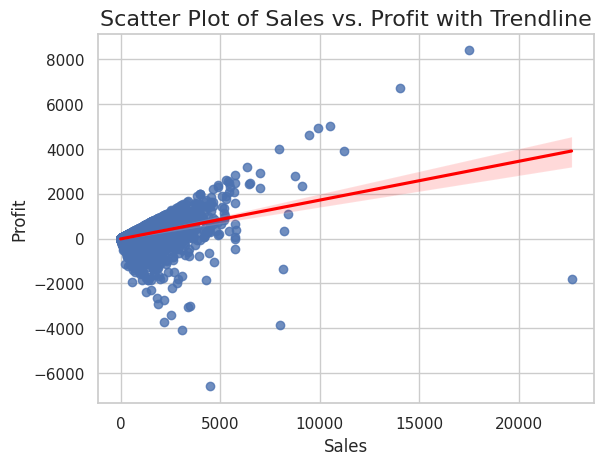

In [89]:
scatter_plot=sns.regplot(df,x='Sales',y='Profit',line_kws={"color": "red"})
plt.title("Scatter Plot of Sales vs. Profit with Trendline", fontsize=16)
# Trendline shows Positive coorelation

# **Customer Segmentation** : Segment customers based on their total sales and profit contribution. Create a scatter plot to visualize these segments and discuss any patterns observed

In [94]:
df[['Customer Name','Segment','Sales','Profit']]

,Customer Name,Segment,Sales,Profit
0,Rick Hansen,Consumer,2309.650,762.1845
1,Justin Ritter,Corporate,3709.395,-288.7650
2,Craig Reiter,Consumer,5175.171,919.9710
3,Katherine Murray,Home Office,2892.510,-96.5400
4,Rick Hansen,Consumer,2832.960,311.5200
...,...,...,...,...
51285,Katrina Edelman,Corporate,65.100,4.5000
51286,Zuschuss Carroll,Consumer,0.444,-1.1100
51287,Laurel Beltran,Home Office,22.920,11.2308
51288,Ross Baird,Home Office,13.440,2.4000


In [96]:
dmd = df.groupby('Customer Name').sum(['Sales','Profit']).reset_index()
dmd

,Customer Name,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,year,month,Profit Margin
0,Aaron Bergman,2049853,516566.0,24644.62750,301,9.800,4683.20800,3128.300,179126,553,1267.783580
1,Aaron Hawkins,1434098,565428.0,20759.51384,231,9.012,2450.92904,2289.410,112700,384,230.410397
2,Aaron Smayling,1440638,558319.0,14212.62840,211,10.060,369.16180,1372.576,120780,390,-62.346665
3,Adam Bellavance,1728856,762372.0,20186.77840,262,8.960,4979.97690,2731.469,136887,492,761.430318
4,Adam Hart,2447345,818743.0,21718.20142,293,7.832,1902.03342,2365.903,169073,724,1220.789562
...,...,...,...,...,...,...,...,...,...,...,...
790,Xylona Preis,1838798,1781278.0,12198.95060,213,5.170,1304.72260,1074.833,122762,482,1024.308532
791,Yana Sorensen,1218648,812394.0,20032.43800,215,4.400,3450.40630,1725.126,124785,540,1019.638356
792,Yoseph Carroll,1135969,461734.0,20164.37760,203,3.920,4347.17660,2341.383,112689,450,1198.552724
793,Zuschuss Carroll,1954689,2318355.0,28479.99226,334,18.812,436.93626,3078.805,171091,613,-1078.618217


In [92]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'year', 'month',
       'Profit Margin'],
      dtype='object')

In [93]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,month,Profit Margin
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,33.000000
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,-7.784693
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10,17.776630
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1,-3.337586
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11,10.996272


In [97]:
def categorize_customer(row):
    if row['Sales'] > 2000 and row['Profit'] > 2000:
        return 'Top Customers'
    elif row['Sales'] > 2000 and row['Profit'] <= 2000:
        return 'High Sales, Low Profit'
    elif row['Sales'] <= 2000 and row['Profit'] > 1000:
        return 'Low Sales, High Profit'
    else:
        return 'Low-Value Customers'

In [98]:
df['Customer_Segment'] = df.apply(categorize_customer, axis=1)

In [99]:
df['Customer_Segment']

,Customer_Segment
0,"High Sales, Low Profit"
1,"High Sales, Low Profit"
2,"High Sales, Low Profit"
3,"High Sales, Low Profit"
4,"High Sales, Low Profit"
...,...
51285,Low-Value Customers
51286,Low-Value Customers
51287,Low-Value Customers
51288,Low-Value Customers


Text(0.5, 1.0, 'Customer Segmentation')

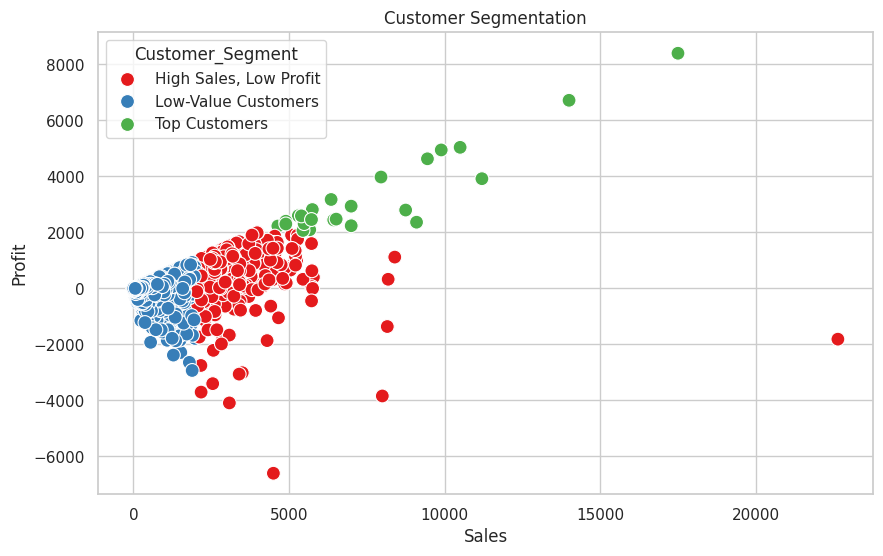

In [101]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=df, x='Sales', y='Profit', hue='Customer_Segment', s=100, palette='Set1')
plt.title('Customer Segmentation')
